# The Binomial Option Pricing Model in Python 💾
<p>This is a simple model that is used to calculate the value of an option.  It breaks down the time expiration in steps to a potentially large amount of steps, which makes it virtually impossible to replicate in something like Excel.</p>
<p>Each step the underlying instrument will move up or down by a specific factor  Here is a <code>breakdown</code>:</p>
<ul>
<li>Choose a time step, <code>t</code>, which is the option's time, <code>T</code> divided by <code>N</code> intervals of length <code>t</code>.</li>

<p>Now, let's temporarily replace these missing value question marks with NaN.</p>


## European Option Theory

<ul>
<p> Remember, for European options, they can only be exercised on the day of expiration, which means valuing these types of options are easier than the American option version.

<p>The option value at expiration is:


- Call payoff=max(Sₜ
​
 −K,0)

 - Put payoff=max(K−Sₜ
​
 ,0)

<p>Where:
    <li>  Sₜ is the stock price at expiration
<li> K is the strike price

<p>
<p>Node specific valuation in the binomial tree:

Option Price = (1/R)((q x Option price if up) + ((1-q) x Option price if down)), where:
<li> R is the risk-free rate
<li> q is the risk-neutral probability given by:
<p>
<ul> q = (R-d)/(u-d)


## American Option Theory

<ul>
<p> Remember, American options can be exercised before expiration.  Therefore, at any node, the option value is the max of either the intrinsic value or the discounted EFV (expected future value):

<p>American Call Price:

- max(S-K, 1/R((q x Option price if up)+ ((1-q)x Option Price if down)))

<p>American Put Price:

- max(K-S, 1/R((q x Option price if up)+ ((1-q)x Option Price if down)))

<p> Remember, the American model price can be higher than the Euro option due to the fleixibility, but American call options

### Import Libraries

In [ ]:
# Import Libaries
import pandas as pd
import numpy_financial as npf
import numpy as np
import yfinance as yf
import thefuzz
import quantsbin

### Option Pricing Model Code

In [18]:
def binomial_option_pricing_model(S, K, T, r, v, N, option_type="call", exercise_type="european"):
    """
Calculate option price using Binomial Option Pricing Model.
    
    Parameters:
    - S: Initial stock price
    - K: Strike price
    - T: Time to expiration (in years)
    - r: Risk-free rate (annualized)
    - v: Volatility (annualized)
    - N: Number of time steps
    - option_type: "call" or "put"
    - exercise_type: "european" or "american"
    
    Returns:
    Option price
    """
    
    dt = T/N  # Single time step
    R = (1 + r)**dt  # Risk-free rate for each time step
    
    # Calculate up and down move factors
    u = (1 + r*dt + v*(dt**0.5))
    d = (1 + r*dt - v*(dt**0.5))
    
    # Risk-neutral probability
    q = (R - d) / (u - d)
    
    # Generate stock price tree
    stock_tree = [[0 for _ in range(N+1)] for _ in range(N+1)]
    for j in range(N+1):
        stock_tree[j][N] = S * (u**j) * (d**(N-j))
    
    # Generate option price tree
    option_tree = [[0 for _ in range(N+1)] for _ in range(N+1)]

    #print(f'Stock tree: {stock_tree} \n Option tree: {option_tree}')
    
    # Calculate option price at expiration
    for j in range(N+1):
        if option_type == "call":
            option_tree[j][N] = max(0, stock_tree[j][N] - K)
        else:
            option_tree[j][N] = max(0, K - stock_tree[j][N])
            
    # Backward induction to calculate option price at each node
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            expected_value = (q * option_tree[j+1][i+1] + (1 - q) * option_tree[j][i+1]) / R
            if exercise_type == "european":
                option_tree[j][i] = expected_value
            else:  # American
                if option_type == "call":
                    early_exercise_value = max(0, stock_tree[j][i] - K)
                else:
                    early_exercise_value = max(0, K - stock_tree[j][i])
                option_tree[j][i] = max(expected_value, early_exercise_value)

    print(f'The value of a {exercise_type} {option_type} option with a: \n \
        - stock price of {S} \n \
        - strike price of {K} \n \
        - {T} years and {N} steps to expiration \n \
        - volatility factor of {v} and a risk-free rate of {r} \n \
is.......{option_tree[0][0]} ')
                
    return option_tree[0][0]

"""# Sample parameters
S = 100  # Initial stock price
K = 100  # Strike price
T = 1  # Time to expiration (1 year)
r = 0.05  # Risk-free rate
v = 0.2  # Volatility
N = 25 # Number of time steps """

# Calculate option prices
european_call_price = binomial_option_pricing_model(S=100, K=100, T=1, r=.05, v=.2, N=100, option_type="call", exercise_type="european")
european_put_price = binomial_option_pricing_model(S=100, K=100, T=1, r=.05, v=.2, N=100, option_type="put", exercise_type="european")
american_call_price = binomial_option_pricing_model(S=100, K=100, T=1, r=.05, v=.2, N=100, option_type="call", exercise_type="american")
american_put_price = binomial_option_pricing_model(S=100, K=100, T=1, r=.05, v=.2, N=100, option_type="put", exercise_type="american")

european_call_price, european_put_price, american_call_price, american_put_price


The value of a european call option with a: 
         - stock price of 100 
         - strike price of 100 
         - 1 years and 100 steps to expiration 
         - volatility factor of 0.2 and a risk-free rate of 0.05 
 is.......10.3929347068057 
The value of a european put option with a: 
         - stock price of 100 
         - strike price of 100 
         - 1 years and 100 steps to expiration 
         - volatility factor of 0.2 and a risk-free rate of 0.05 
 is.......5.631029944901605 
The value of a american call option with a: 
         - stock price of 100 
         - strike price of 100 
         - 1 years and 100 steps to expiration 
         - volatility factor of 0.2 and a risk-free rate of 0.05 
 is.......10.3929347068057 
The value of a american put option with a: 
         - stock price of 100 
         - strike price of 100 
         - 1 years and 100 steps to expiration 
         - volatility factor of 0.2 and a risk-free rate of 0.05 
 is.......100 


(10.3929347068057, 5.631029944901605, 10.3929347068057, 100)

## Using Geometric Brownian Motion to run Monte Carlo simulations on European Options

<ul>
<p> This is a simplistic model best fit for European options, but the added complexity of American options makes this model an inferior choice for the American valuations, the next model will highlight a more complexed approach for the valuation of American options
<p> Monte Carlo simulations can be used in this instance to estimate prices of options by simulaing a large path of potential stock prices and then averaging the payoffs

Here is the breakdown of the process using the geometric Brownian motion formula:
- Sₜ + Δt =  Sₜ exp((r-((v**2)/2))Δt + v ((Δt)**2)Z)


<p>Where:
<li>Sₜ is stock price at time t
<li> r is the risk-free rate
<li> v is the volatility
<li> Δt is the time step
<li> Z is a random number from a standard normal distribution

<p>
<p>1) Calculate the option payoff at the end of each path
<p>2) Average the option payoffs and discount them to get the option price





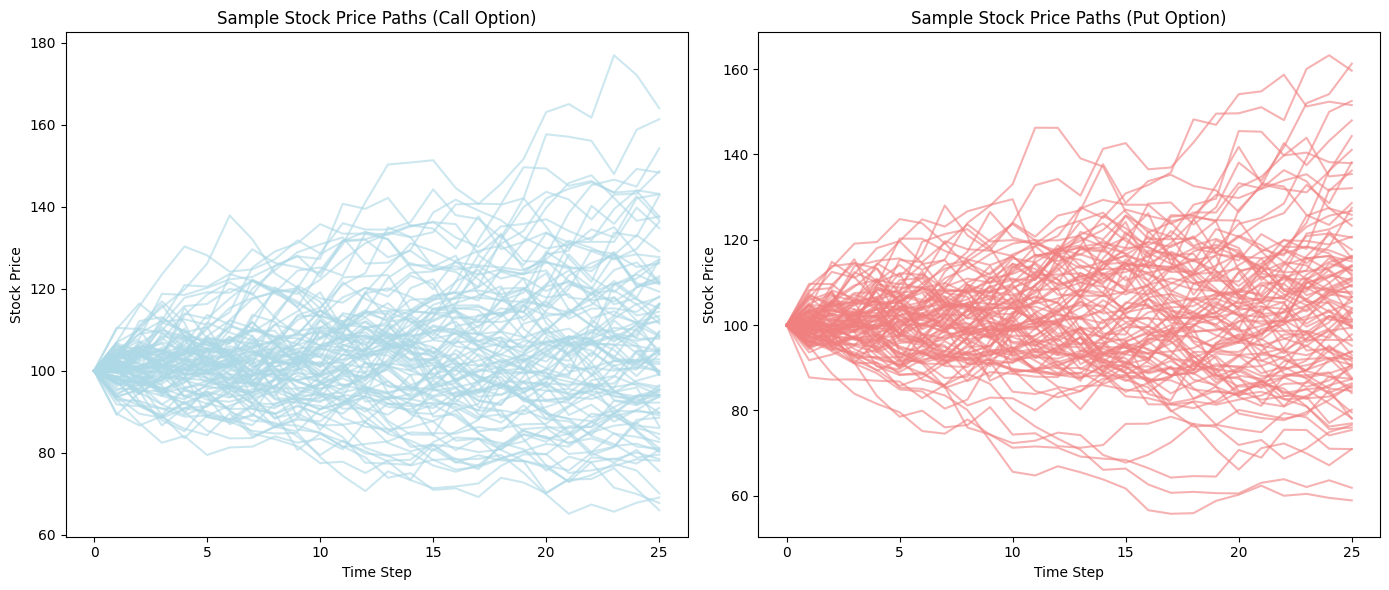

(10.482941514759377, 5.770978075559525)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_option_price(S, K, T, r, v, N, num_simulations, option_type="call"):
    """
    Calculate option price using Monte Carlo simulation.
    
    Parameters:
    - S: Initial stock price
    - K: Strike price
    - T: Time to expiration (in years)
    - r: Risk-free rate (annualized)
    - v: Volatility (annualized)
    - N: Number of time steps
    - num_simulations: Number of simulated price paths
    - option_type: "call" or "put"
    
    Returns:
    Option price
    """
    
    dt = T/N
    discount_factor = np.exp(-r * T)
    
    # Simulating stock price paths
    stock_prices = np.zeros((N+1, num_simulations))
    stock_prices[0] = S
    for t in range(1, N+1):
        brownian_motion = np.random.standard_normal(num_simulations)
        stock_prices[t] = stock_prices[t-1] * np.exp((r - 0.5 * v**2) * dt + v * np.sqrt(dt) * brownian_motion)
    
    # Calculating the option payoffs at the end of each path
    if option_type == "call":
        option_payoff = np.maximum(stock_prices[-1] - K, 0)
    else:
        option_payoff = np.maximum(K - stock_prices[-1], 0)
    
    # Averaging and discounting the option payoffs
    option_price = discount_factor * np.mean(option_payoff)
    
    return option_price, stock_prices

# Calculate option prices using Monte Carlo simulation
num_simulations = 10000
S = 100  # Initial stock price
K = 100  # Strike price
T = 1  # Time to expiration (1 year)
r = 0.05  # Risk-free rate
v = 0.2  # Volatility
N = 25 # Number of time steps

#Assign function to variables
european_call_mc_price, call_stock_paths = monte_carlo_option_price(S, K, T, r, v, N, num_simulations, option_type="call")
european_put_mc_price, put_stock_paths = monte_carlo_option_price(S, K, T, r, v, N, num_simulations, option_type="put")

# Plotting some of the simulated stock price paths
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
for _ in range(100):  # Plotting the first 100 paths
    plt.plot(call_stock_paths[:, _], color='lightblue', alpha=0.6)
plt.title("Sample Stock Price Paths (Call Option)")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")

plt.subplot(1, 2, 2)
for _ in range(100):  # Plotting the first 100 paths
    plt.plot(put_stock_paths[:, _], color='lightcoral', alpha=0.6)
plt.title("Sample Stock Price Paths (Put Option)")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")

plt.tight_layout()
plt.show()

european_call_mc_price, european_put_mc_price


## Monte Carlo Simulation on American Options

<p> Due to American options having the added flexibility of being exercised early, a method used to tackle this added complexity is known as the LSMC, or Least Squares Monte Carlo approach.

<p> It works as follows:

- Simulate a large number of stock price paths using geometric Brownian motion like in the above European valuation
- Start backwards induction at second to last time step or N - 1, estimate the continuation of the value of the option by regressing it on stock prices
- At each time step and for each path, compare the continuation value to the intrinsic value.  If the itnrinsic value is higher, aissgn the option that value and consider it "exercised" for that path
- The option price is then the average discounted payoff across all paths


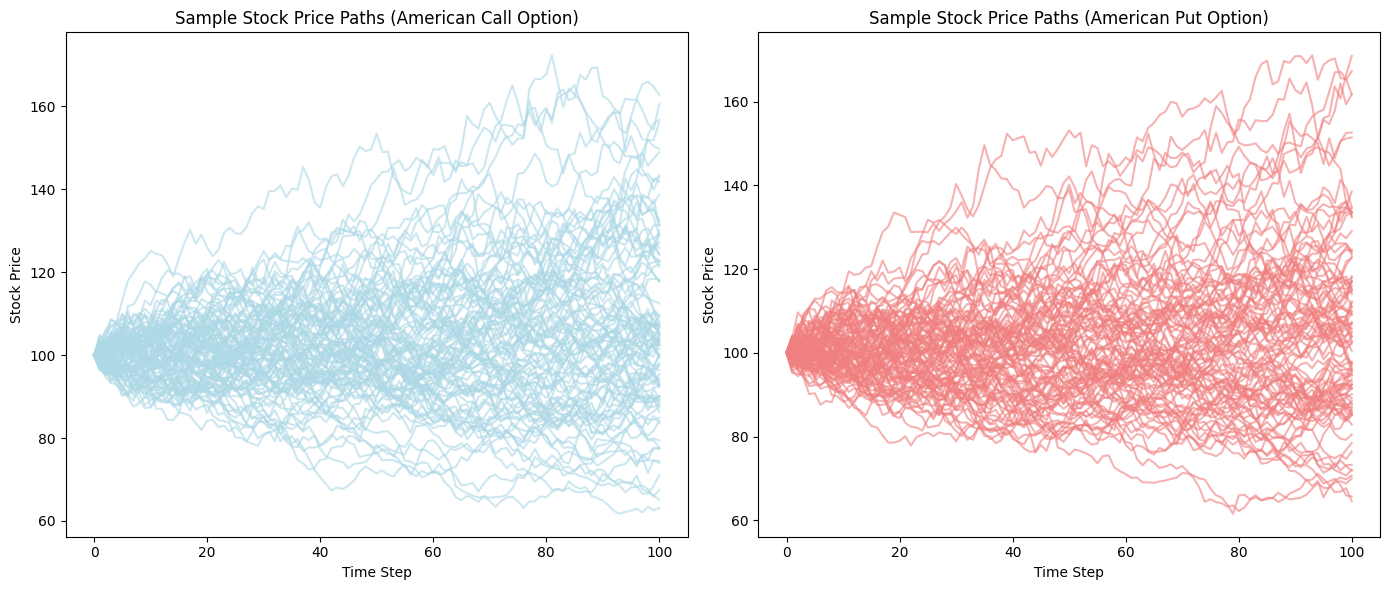

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Redefining the LSM approach for American options
def lsm_american_option_price(S, K, T, r, v, N, num_simulations, option_type="call"):
    dt = T/N
    discount_factor = np.exp(-r * dt)
    
    stock_prices = np.zeros((N+1, num_simulations))
    stock_prices[0] = S
    for t in range(1, N+1):
        brownian_motion = np.random.standard_normal(num_simulations)
        stock_prices[t] = stock_prices[t-1] * np.exp((r - 0.5 * v**2) * dt + v * np.sqrt(dt) * brownian_motion)
    
    if option_type == "call":
        option_values = np.maximum(stock_prices[-1] - K, 0)
    else:
        option_values = np.maximum(K - stock_prices[-1], 0)
    
    for t in range(N-1, 0, -1):
        if option_type == "call":
            itm = stock_prices[t] < K
        else:
            itm = stock_prices[t] > K

        if itm.any():
            X = np.column_stack([stock_prices[t, itm], stock_prices[t, itm]**2, stock_prices[t, itm]**3])
            y = option_values[itm] * discount_factor
            regression = LinearRegression().fit(X, y)
            
            continuation_values = regression.predict(X)
            
            if option_type == "call":
                exercise_values = np.maximum(stock_prices[t, itm] - K, 0)
            else:
                exercise_values = np.maximum(K - stock_prices[t, itm], 0)
            
            option_values[itm] = np.where(exercise_values > continuation_values, exercise_values, y)
    
    option_price = np.mean(option_values) * discount_factor
    return option_price, stock_prices

def lsm_american_option_plot(call_stock_paths,put_stock_paths):
    # Plotting some of the simulated stock price paths
    plt.figure(figsize=(14,6))

    plt.subplot(1, 2, 1)
    for _ in range(100):  
        plt.plot(call_stock_paths[:, _], color='lightblue', alpha=0.6)
    plt.title("Sample Stock Price Paths (American Call Option)")
    plt.xlabel("Time Step")
    plt.ylabel("Stock Price")

    plt.subplot(1, 2, 2)
    for _ in range(100):  
        plt.plot(put_stock_paths[:, _], color='lightcoral', alpha=0.6)
    plt.title("Sample Stock Price Paths (American Put Option)")
    plt.xlabel("Time Step")
    plt.ylabel("Stock Price")

    plt.tight_layout()
    plt.show()
# Sample parameters
S = 100  # Initial stock price
K = 100  # Strike price
T = 1  # Time to expiration (1 year)
r = 0.05  # Risk-free rate
v = 0.2  # Volatility
N = 100  # Number of time steps
num_simulations = 10000

# Calculate option prices using LSM approach
american_call_mc_price, call_stock_paths_lsm = lsm_american_option_price(S, K, T, r, v, N, num_simulations, option_type="call")
american_put_mc_price, put_stock_paths_lsm = lsm_american_option_price(S, K, T, r, v, N, num_simulations, option_type="put")
american_call_mc_price, american_put_mc_price

# Call plotting function
lsm_american_option_plot(call_stock_paths_lsm,put_stock_paths_lsm)









## Modeling European Options with Black-Scholes

<p> European Call Option Black-Scholes formula:

- C = S0 x e**(-qT) x N(d1) - K x e **(-rT) x N(d2)

<p> European Put Option Black-Scholes formula:

- P = K x e**(-rT) x N(-d2) - S0 x e**(-qT) x N(-d1)

<p> Where:

- C is the call option price
- P is the put option price
- S0 is the current stock price
- K is the strike price
- T is the time to expiration in years
- r is the risk-free rate
- q is the dividend yield (0 if no dividends)
- v is the volatility of the stock's returns
- N(d) is the cumulative distribution function of the standard normal distribution
- d1 and d2 are given by:

<li>d1 = (ln(S0/K) + (r-q+((v**2)/2)xT)) / (v x T**2)
<p>
<li>d2 = d1 - v x T**2



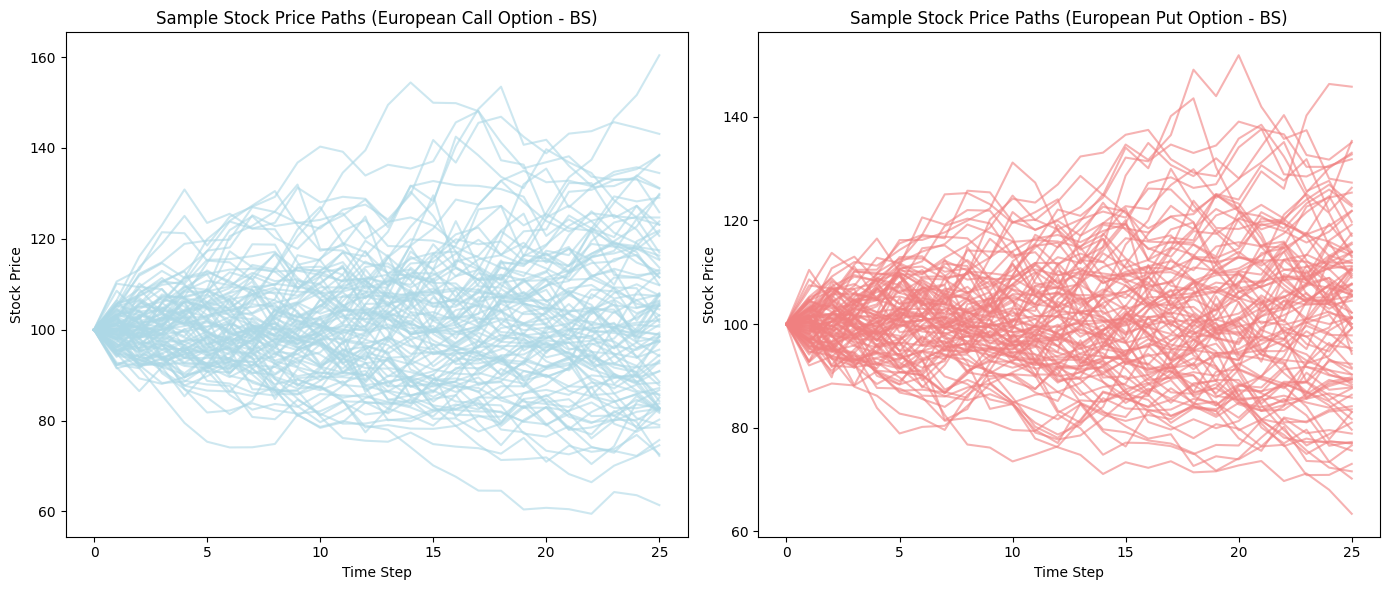

(10.372124575530473, 5.520751309653339)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def bs_monte_carlo_option_price(S, K, T, r, v, N, num_simulations, option_type="call"):
    
 
    """
    Calculate option price using Monte Carlo simulation based on Black-Scholes model.
    
    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration (in years)
    - r: Risk-free rate (annualized)
    - v: Volatility (annualized)
    - N: Number of time steps
    - num_simulations: Number of simulated price paths
    - option_type: "call" or "put"
    
    Returns:
    Option price and simulated stock price paths
    """
    
    dt = T/N
    discount_factor = np.exp(-r * T)
    
    # Simulating stock price paths
    stock_prices = np.zeros((N+1, num_simulations))
    stock_prices[0] = S
    for t in range(1, N+1):
        brownian_motion = np.random.standard_normal(num_simulations)
        stock_prices[t] = stock_prices[t-1] * np.exp((r - 0.5 * v**2) * dt + v * np.sqrt(dt) * brownian_motion)
    
    # Calculating the option payoffs at the end of each path
    if option_type == "call":
        option_payoff = np.maximum(stock_prices[-1] - K, 0)
    else:
        option_payoff = np.maximum(K - stock_prices[-1], 0)
    
    # Averaging and discounting the option payoffs
    option_price = discount_factor * np.mean(option_payoff)
    
    return option_price, stock_prices

# Calculate option prices using Monte Carlo simulation
num_simulations = 10000
S = 100  # Initial stock price
K = 100  # Strike price
T = 1  # Time to expiration (1 year)
r = 0.05  # Risk-free rate
v = 0.2  # Volatility
N = 25 # Number of time steps

# Calculate option prices using Monte Carlo simulation based on Black-Scholes model
bs_call_mc_price, bs_call_stock_paths = bs_monte_carlo_option_price(S, K, T, r, v, N, num_simulations, option_type="call")
bs_put_mc_price, bs_put_stock_paths = bs_monte_carlo_option_price(S, K, T, r, v, N, num_simulations, option_type="put")

# Plotting some of the simulated stock price paths
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
for _ in range(100):  # Plotting the first 100 paths
    plt.plot(bs_call_stock_paths[:, _], color='lightblue', alpha=0.6)
plt.title("Sample Stock Price Paths (European Call Option - BS)")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")

plt.subplot(1, 2, 2)
for _ in range(100):  # Plotting the first 100 paths
    plt.plot(bs_put_stock_paths[:, _], color='lightcoral', alpha=0.6)
plt.title("Sample Stock Price Paths (European Put Option - BS)")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")

plt.tight_layout()
plt.show()

bs_call_mc_price, bs_put_mc_price
